In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# import seaborn as sns

In [2]:
# sns.set_theme(style="whitegrid")
# # sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("paper")

## Addition

In [3]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,MET,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,MET,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,MET,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,MET,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,MET,2885.904018,3.1989,2.86,9148.854,8253.685491


### Single metric per frequency

In [4]:
area_df = adder_df[["Area", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design Addition_Original Addition_HUB
Freq                                 
0            4375.896031  4037.208032
200          4251.004810  4033.209614
250          4251.004810  4033.209614
300          4372.368015  4060.022415
350          4636.262421  4168.684820

In [7]:
power_df.head()

Power             
Design Addition_Original Addition_HUB
Freq                                 
200               6.1782       5.7620
250               5.4645       5.7673
300               5.7164       5.2012
350               5.8172       5.4014
400               5.6473       5.6930

In [5]:
# adder_df = adder_df.loc[adder_df['Freq'] != 0.0].loc[adder_df['Freq']%1 == 0.0]
# Remove non-constrained case
tmp_df = adder_df[adder_df["Freq"] != 0]

area_df = tmp_df[["Area", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
power_df = tmp_df[["Power", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = tmp_df[["Delay", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = tmp_df[["Energy", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = tmp_df[["ADP", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design Addition_Original Addition_HUB
Freq                                 
200          4251.004810  4033.209614
250          4251.004810  4033.209614
300          4372.368015  4060.022415
350          4636.262421  4168.684820
400          4700.707222  4302.043228

In [12]:
# Percentage gain and loss
area_gain = (area_df['Area']['Addition_Original'].values - area_df['Area']
             ['Addition_HUB'].values) / area_df['Area']['Addition_Original'].values
power_gain = (power_df['Power']['Addition_Original'].values - power_df['Power']
              ['Addition_HUB'].values) / power_df['Power']['Addition_Original'].values
delay_gain = (delay_df['Delay']['Addition_Original'].values - delay_df['Delay']
              ['Addition_HUB'].values) / delay_df['Delay']['Addition_Original'].values
energy_gain = (energy_df['Energy']['Addition_Original'].values - energy_df['Energy']
               ['Addition_HUB'].values) / energy_df['Energy']['Addition_Original'].values
adp_gain = (ADP_df['ADP']['Addition_Original'].values - ADP_df['ADP']
            ['Addition_HUB'].values) / ADP_df['ADP']['Addition_Original'].values

# print('        [ 8 bits   | 16 bits  | 32 bits  ]')
# print('area  :', area_gain)
# print('power :', power_gain)
# print('delay :', delay_gain)
# print('energy:', energy_gain)
# print('adp:   ', adp_gain)
# area_gain

In [10]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Addition_HUB'] / \
    area_df['Area']['Addition_Original']
power_gain = 100 * power_df['Power']['Addition_HUB'] / \
    power_df['Power']['Addition_Original']
delay_gain = 100 * delay_df['Delay']['Addition_HUB'] / \
    delay_df['Delay']['Addition_Original']
energy_gain = 100 * energy_df['Energy']['Addition_HUB'] / \
    energy_df['Energy']['Addition_Original']
adp_gain = 100 * ADP_df['ADP']['Addition_HUB'] / \
    ADP_df['ADP']['Addition_Original']

<Figure size 1000x500 with 0 Axes>

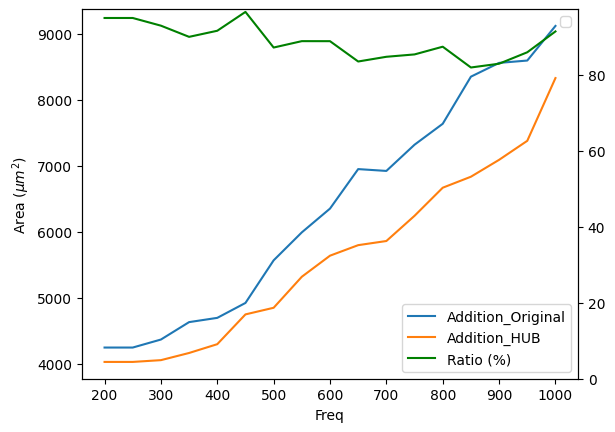

In [11]:
fig = plt.figure(figsize=(10, 5))

ax1 = area_df.plot.line(
    y="Area",
    rot=0,
    ylabel=r"Area ($\mu m^2$)",
)

ax2 = ax1.twinx()

ax2 = area_gain.plot.line(
    rot=0,
    # ylabel="%",
    ax=ax2,
    color='g',
    label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='lower right')


plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

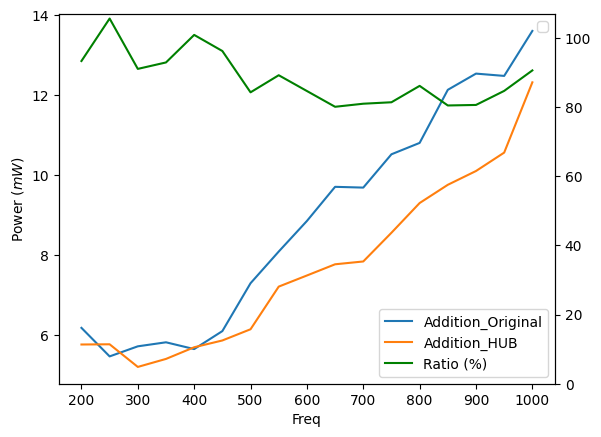

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = power_df.plot.line(
    y="Power",
    rot=0,
    ylabel=r"Power ($mW$)"
)

ax2 = ax1.twinx()

ax2 = power_gain.plot.line(
    rot=0,
    # ylabel="%",
    ax=ax2,
    color='g',
    label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='lower right')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

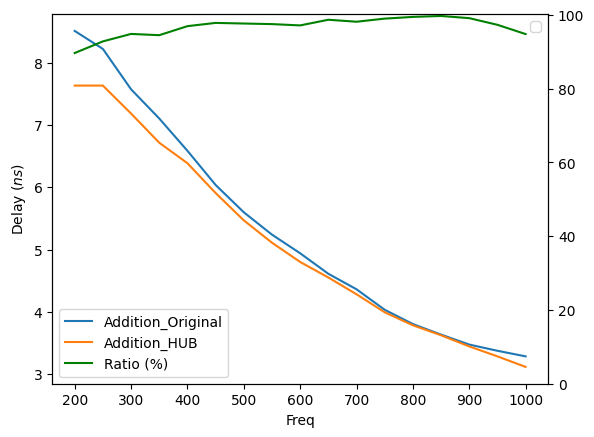

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = delay_df.plot.line(
    y="Delay",
    rot=0,
    ylabel=r"Delay ($ns$)"
)

ax2 = ax1.twinx()

ax2 = delay_gain.plot.line(
    rot=0,
    # ylabel="%",
    ax=ax2,
    color='g',
    label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

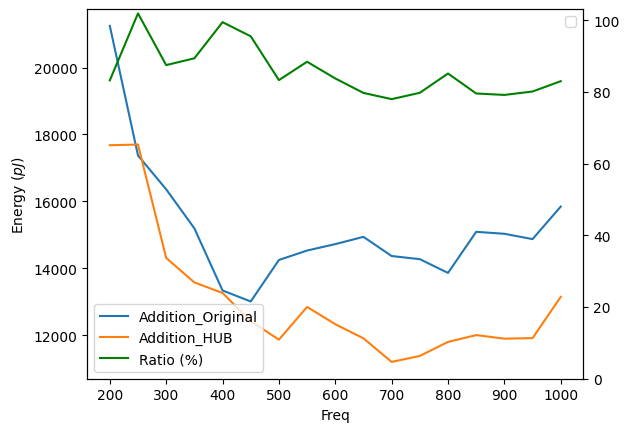

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = energy_df.plot.line(
    y="Energy",
    rot=0,
    ylabel=r"Energy ($pJ$)"
)

ax2 = ax1.twinx()

ax2 = energy_gain.plot.line(
    rot=0,
    # ylabel="%",
    ax=ax2,
    color='g',
    label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

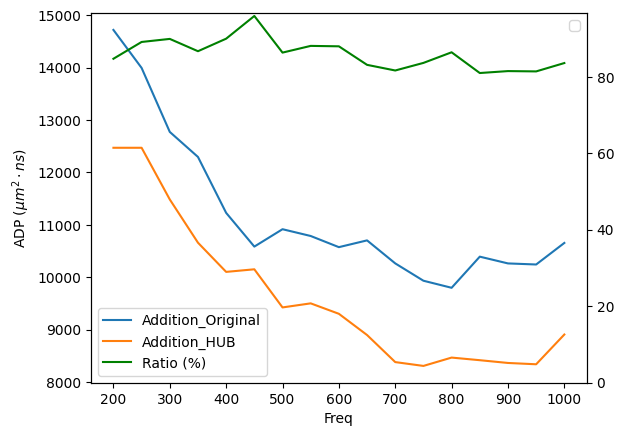

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = ADP_df.plot.line(
    y="ADP",
    rot=0,
    ylabel=r"ADP ($\mu m^2 \cdot ns$)"
)

ax2 = ax1.twinx()

ax2 = adp_gain.plot.line(
    rot=0,
    # ylabel="%",
    ax=ax2,
    color='g',
    label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

### Multiple bitwidths

In [ ]:
# https://gitlab.com/ciraig/lca_standard_graphs
def plot_grouped_stackedbars(df, ix_categories, ix_entities_compared, norm='max', err_pos=None, err_neg=None,
                             palette_def=('pastel', 'deep', 'dark'), width=0.3, figsize=(8, 4), xaxis_label=''):
    """ Grouped stacked-bars for both comparison and contribution analysis

    This plot groups bars, representing the total scores of different entities
    [ix_entities_compared] in terms of multiple comparison categories
    [ix_categories], while at the same time breaking down these total scores
    into contribution analysis.

    For example, compare two vehicles (ix_entities_compared) in terms of
    climate change and resource depletion impacts (ix_categories), and break
    down their total impacts in terms of multiple lifecycle stages, such as the
    contribution of vehicle production, use phase and end-of-life treatment.

    The function uses a color polette to distinguish between lifecycle stages,
    and increasingly darker variants of this palette (from pastel, to deep, to
    dark, by default) to distinguish between the technologies/scenarios
    being compared (ix_entities_compared).

    All colour palettes must be defined explicitly. For comparisons involving
    many compared entities (>3), it may be more convenient to use
    `plot_grouped_stackedbar_wlargegroups()`, which automatically generates the
    shading gradient. Unfortunately, this function does not allow for the
    definition of error margins (confidence intervals).


    Parameters
    ----------

    df : pandas multi-index dataframe, as generated from build_comparsison_table()

        The DataFrame must be multi-index, with one index level indicating the
        comparison category/criteria, and another level indicating the entities
        being compared. All columns must represent an element of the
        contribution analysis

        Important: ALL columns in the dataframe must be relevant for the
        contribution analysis, except those that are singled out as defining
        confidence intervals (`err_pos`, `err_neg`). All other columns should
        be removed or used as indexes

    ix_categories : string
        The name of the index level that holds the categories/criteria for the
        comparison. For example, types of life cycle impacts

    ix_entities_compared : string
        The name of the index level that holds the entities being compared,
        such as competing products, technologies, or scenarios

    norm : None or string {'max' | index of reference entity }
        If Norm is None, the stacked bars are not being normalized

        If norm == 'max' (default): Within each comparison categories, the
        different entities are normalized relative to the entity with the
        largest score.

        If norm is the index of a specific reference entity, all other
        entities are normalized relative to that one.

    err_neg, err_pos: None, or string
        The name of the column that holds the negative and positive errors
        associated with the total sum of each row of df values
        If None, no error bars will be drawn

    palette_def: tupple of matplotlib or seaborn "categorical" palette definitions
        These palettes should present the same colors, but with different
        lightness levels, forming a gradient from lightest to darkest.

    width : float
        The width of the bars.

    figsize : tuple
        The width and height of figure

    xaxis_label : string
        The label/title of the x-axis

    Returns
    -------
    ax, fig : matplotlib axes and figure

    See Also
    --------
    Depends on internal functions _normalize_impacts() and _generate_legend()

    """

    # Alternative approach (maybe simpler for just two scenarios):
    # https://stackoverflow.com/questions/40121562/clustered-stacked-bar-in-python-pandas

    # Hardcoded
    edgecolor = 'k'
    transparent = (0, 0, 0, 0)

    # Test that there are not too many entities compared.
    if len(df.index.get_level_values(ix_entities_compared).unique()) > 3:
        print("Warning. Too many entities being compared. Please use `plot_grouped_stackedbars_wlargegroups()` instead.")
        return None

    # Normalize
    if norm is not None:
        if norm == 'max':
            df = _normalize_impacts(df, ix_categories, ix_entities_compared,
                                    donotsumbutnormalize=(err_neg, err_pos))
        else:
            df = _normalize_impacts(df, ix_categories, ix_entities_compared, ref=norm,
                                    donotsumbutnormalize=(err_neg, err_pos))

    # Initializations. Creates two subplots, the first one (ax) for the actual figure, and the second (ax2) as dummy to
    # display the legend without this legend overlapping with the plot but still within the bounds of the figure.
    # width_ratios is dummy ratio to make second plot very small
    fig, (ax, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [100, 1]},
                                  facecolor='white', figsize=figsize)
    # make dummy axis disapear
    ax2.get_yaxis().set_ticks([])
    ax2.axis('off')

    # All compared entities, in order of appearance
    all_entities = df.index.get_level_values(ix_entities_compared).unique()
    all_contributions = [i for i in df.columns if i not in [err_neg, err_pos]]

    # Determine number of entities, portions, and colors
    n_entities_compared = len(all_entities)
    n_palettes = len(palette_def)

    # Define palettes
    palettes = []
    if n_entities_compared <= n_palettes:
        for i in range(n_palettes - n_entities_compared, n_palettes):
            palettes += [sns.color_palette(palette_def[i])]
    else:
        palettes = None

    # Loop over all entities compared
    for i, ent in enumerate(all_entities):

        # Subset of contribution data for this loop
        sub = df.xs(ent, axis=0, level=ix_entities_compared)[all_contributions]

        if err_pos:
            # Error bar data fro this loop, if applicable
            err = df.xs(ent, axis=0, level=ix_entities_compared)[
                [err_neg, err_pos]].values.T
        else:
            err = None

        # Plot horizontal bar
        sub.plot.barh(ax=ax, stacked=True, position=i, width=width, zorder=-1,
                      color=sns.color_palette(palettes[i]), edgecolor=edgecolor, label='_nolegend_')

        # Plot over this bar with a transparent bar, to add the confidence interval
        sub.sum(1).plot.barh(ax=ax, position=i, width=width,
                             color=transparent, xerr=err, label='_nolegend_')

        if i == n_entities_compared - 1:

            # Generate the legend complement explaining about shading
            legend_elements = _generate_legend(all_entities)

            # Integrate in legend and plot legend
            handles, labels = ax.get_legend_handles_labels()
            handles2 = handles[-len(all_contributions):] + legend_elements

    # Legend definition (hidden in first subplot, but displayed in second)
    ax.get_legend().remove()
    ax2.legend(handles=handles2, loc='center left', bbox_to_anchor=(0, 0.5))

    # Axis title
    ax.xaxis.set_label_text(xaxis_label)
    ax.yaxis.set_label_text('')

    # Rescale
    ax.autoscale()  # Important to not have the bars come right up to th edge of figure
    fig.tight_layout()  # Important to not have labels and legend extend beyond figure

    return ax, fig

In [8]:
# https://stackoverflow.com/a/22845857
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", axe=None, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    if axe is None:
        axe = plt.subplot(111)
    # print(n_df, n_col, n_ind)

    for df in dfall:  # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0.5,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      edgecolor='k',
                      **kwargs)  # make bar plots

    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for k, rect in enumerate(pa.patches):  # for each index
                # print(i, j, k)
                rect.set_x(rect.get_x() + 1 / float(n_df + 1)
                           * i / float(n_col))
                rect.set_hatch(H * int(2*i / n_col))  # edited part
                # rect.set_hatch(H * i)  # edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 0.5 *
                   (n_df-1) / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_title(title)
    axe.grid(axis="y", zorder=0)

    # Add invisible data to add another legend
    n = []
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * 2*i))

    # Reverse handles to show in the same order
    # if labels is not None:
    #     l2 = axe.legend(n, labels, loc=[1.01, 0.25])
    #     axe.add_artist(l2)
    l1 = plt.legend(h[:n_col][::-1], l[:n_col][::-1], loc=[1.01, 0.5])
    return axe

In [7]:
# Select unconstrained operators
tmp_df = adder_df[adder_df["Freq"] == 0]


area_df = tmp_df[["Area", "Design"]].groupby(
    ["Design"], sort=False).sum().unstack(0)
power_df = tmp_df[["Power", "Design"]].groupby(
    ["Design"], sort=False).sum().unstack(0)
delay_df = tmp_df[["Delay", "Design"]].groupby(
    ["Design"], sort=False).sum().unstack(0)
energy_df = tmp_df[["Energy", "Design"]].groupby(
    ["Design"], sort=False).sum().unstack(0)
ADP_df = tmp_df[["ADP", "Design"]].groupby(
    ["Design"], sort=False).sum().unstack(0)

area_df.head()

      Design           
Area  Addition_Original    4375.896031
      Addition_HUB         4037.208032
dtype: float64

In [18]:
# Unconstrained results

area_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [2*60.6816, 2*171.4608, 2*392.0784],
                                   'Total': [576.2400, 1176.7056, 2622.9504],
                                   'Encoder': [116.4240, 227.2032, 564.2448],
                                   # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                   # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                   })

area_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [2*68.2080, 2*166.2864, 2*403.8384],
                                   'Total': [517.2048, 1085.4480, 2434.5552],
                                   'Encoder': [76.4400, 162.5232, 394.9008],
                                   # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                   # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                   })

area_std.set_index('Bits', inplace=True)
area_std['Core'] = area_std['Total'] - \
    area_std['Decoders'] - area_std['Encoder']
area_std = area_std[['Decoders', 'Core', 'Encoder']]

area_hub.set_index('Bits', inplace=True)
area_hub['Core'] = area_hub['Total'] - \
    area_hub['Decoders'] - area_hub['Encoder']
area_hub = area_hub[['Decoders', 'Core', 'Encoder']]

area_std

,Decoders,Core,Encoder
Bits,,,
8,121.3632,338.4528,116.4240
16,342.9216,606.5808,227.2032
32,784.1568,1274.5488,564.2448


In [19]:
# Unconstrained results

power_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [2*5.86e-02, 2*0.140, 0.272+0.271],
                                    'Total': [0.591, 1.222, 2.774],
                                    'Encoder': [0.112, 0.213, 0.673],
                                    # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                    # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                    })

power_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [6.58e-02+6.61e-02, 0.137+0.138, 0.276+0.275],
                                    'Total': [0.536, 1.159, 2.423],
                                    'Encoder': [7.56e-02, 0.151, 0.370],
                                    # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                    # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                    })

power_std.set_index('Bits', inplace=True)
power_std['Core'] = power_std['Total'] - \
    power_std['Decoders'] - power_std['Encoder']
power_std = area_std[['Decoders', 'Core', 'Encoder']]

power_hub.set_index('Bits', inplace=True)
power_hub['Core'] = power_hub['Total'] - \
    power_hub['Decoders'] - power_hub['Encoder']
power_hub = area_hub[['Decoders', 'Core', 'Encoder']]

power_std

,Decoders,Core,Encoder
Bits,,,
8,121.3632,338.4528,116.4240
16,342.9216,606.5808,227.2032
32,784.1568,1274.5488,564.2448


In [20]:
# Unconstrained results
# Initiliatized with Ending times

delay_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [0.28, 0.60, 0.89],
                                    'Core': [1.45, 2.37, 3.40],
                                    'Encoder': [1.79, 2.89, 4.30],
                                    # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                    # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                    })

delay_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [0.27, 0.60, 0.92],
                                    'Core': [1.44, 2.40, 3.53],
                                    'Encoder': [1.63, 2.64, 3.86],
                                    # 'Component': ['Decoders', 'Core', 'Encoder', 'Decoders', 'Core', 'Encoder'],
                                    # 'Area': [2*60.6816, 576.2400-116.4240-2*60.6816, 116.4240, 2*68.2080, 517.2048-76.4400-2*68.2080, 76.4400]
                                    })

# Compute real timing
delay_std.set_index('Bits', inplace=True)
delay_std['Encoder'] = delay_std['Encoder'] - delay_std['Core']
delay_std['Core'] = delay_std['Core'] - delay_std['Decoders']

delay_hub.set_index('Bits', inplace=True)
delay_hub['Encoder'] = delay_hub['Encoder'] - delay_hub['Core']
delay_hub['Core'] = delay_hub['Core'] - delay_hub['Decoders']

delay_std

,Decoders,Core,Encoder
Bits,,,
8,0.28,1.17,0.34
16,0.60,1.77,0.52
32,0.89,2.51,0.90


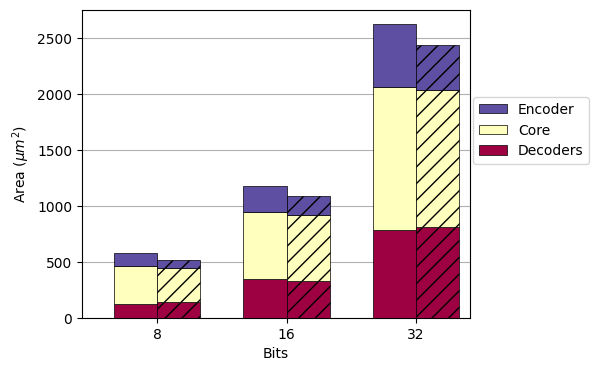

In [21]:
ax = plot_clustered_stacked([area_std, area_hub], [
                            "Std", "HUB"], title='', zorder=3, ylabel=r"Area ($\mu m^2$)", cmap=plt.cm.Spectral)

fig = ax.get_figure()
fig.set_size_inches(5, 4)

# plt.savefig("area_adder_split.pdf", bbox_inches="tight")
plt.show()

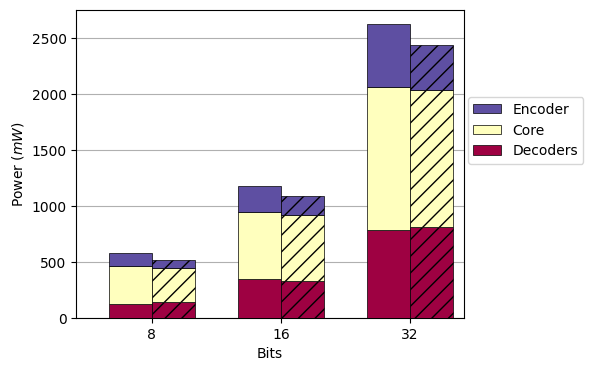

In [12]:
ax = plot_clustered_stacked([power_std, power_hub], [
                            "Std", "HUB"], title='', zorder=3, ylabel=r"Power ($mW$)", cmap=plt.cm.Spectral)

fig = ax.get_figure()
fig.set_size_inches(5, 4)

# plt.savefig("power_adder_split.pdf", bbox_inches="tight")
plt.show()

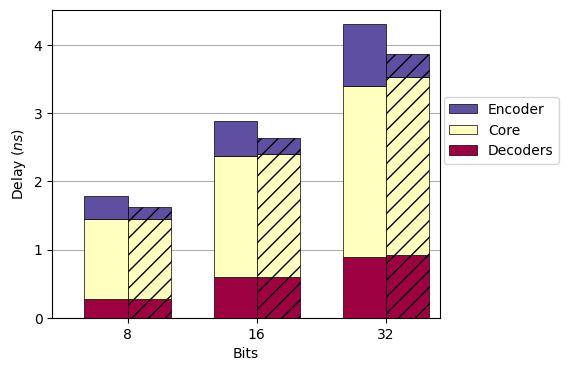

In [13]:
ax = plot_clustered_stacked([delay_std, delay_hub], [
                            "Std", "HUB"], title='', zorder=3, ylabel=r"Delay ($ns$)", cmap=plt.cm.Spectral)

fig = ax.get_figure()
fig.set_size_inches(5, 4)

# plt.savefig("delay_adder_split.pdf", bbox_inches="tight")
plt.show()

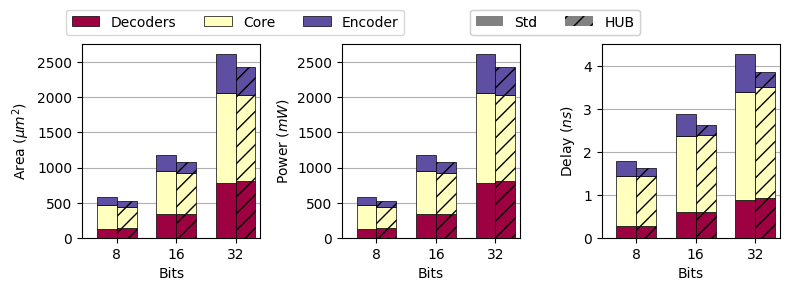

In [24]:
# Grouped

fig, axs = plt.subplots(nrows=1, ncols=3)

ax1 = plot_clustered_stacked([area_std, area_hub], [
    "Std", "HUB"], axe=axs[0], title='', zorder=3, ylabel=r"Area ($\mu m^2$)", cmap=plt.cm.Spectral)
ax2 = plot_clustered_stacked([power_std, power_hub], [
    "Std", "HUB"], axe=axs[1], title='', zorder=3, ylabel=r"Power ($mW$)", cmap=plt.cm.Spectral)
ax3 = plot_clustered_stacked([delay_std, delay_hub], [
    "Std", "HUB"], axe=axs[2], title='', zorder=3, ylabel=r"Delay ($ns$)", cmap=plt.cm.Spectral)


## Set global legend ##
# ax1.get_legend().remove()
# ax2.get_legend().remove()
ax3.get_legend().remove()

fig = plt.gcf()

h, l = ax1.get_legend_handles_labels()
# Add invisible data to add another legend
n = []
for i in range(2):
    # Bug with hatch. Solved with alpha!=1
    n.append(ax1.bar(0, 0, color="gray", hatch='/'*2*i, alpha=0.99))
l2 = fig.legend(n, ["Std", "HUB"],
                loc='upper center',
                bbox_to_anchor=(0.7, 1.1),
                ncol=2,)

axLine, axLabel = h, l
fig.legend(h[:3], l[:3],
           loc='upper center',
           ncol=3,
           #    title='Component',
           bbox_to_anchor=(0.3, 1.1)
           )
fig.add_artist(l2)


fig.set_size_inches(8, 8/3)
fig.tight_layout()

plt.savefig("adder_split.pdf", bbox_inches="tight")
plt.show()

In [152]:
#  axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
n_ind = n_ind = len(df_std.index)
n_df = 3


(np.arange(0, 2 * n_ind, 2)+1 / float(n_df + 1)) / 2.  # too rigth


(np.arange(0, 2 * n_ind, 2)+0.5 / float(n_df + 1)) / 2.  # too left

(np.arange(0, 2 * n_ind, 2)+0.75 / float(n_df + 1)) / 2.  # too left

array([0.09375, 1.09375, 2.09375])

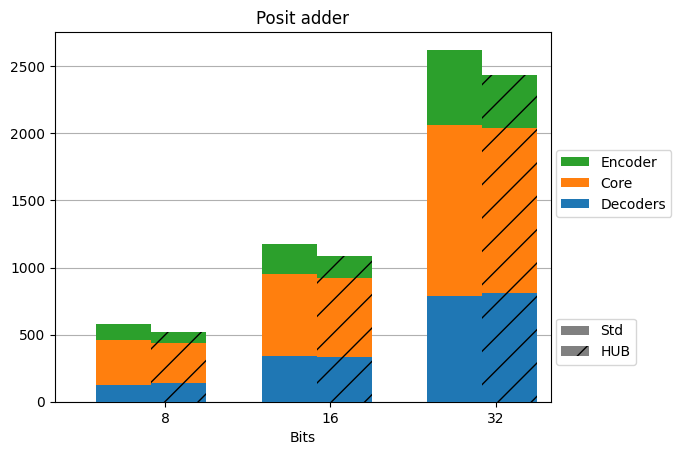

In [181]:
ax = plot_clustered_stacked(
    [df_std, df_hub], ["Std", "HUB"], title='Posit adder', zorder=3)

fig = ax.get_figure()
# fig.set_size_inches(18, 8)

plt.show()

In [45]:
df1 = pd.DataFrame(np.random.rand(4, 2), index=[
                   "A", "B", "C", "D"], columns=["zI", "yJ"])
df1.index.name = 'Criteria'
df1

,zI,yJ
Criteria,,
A,0.249939,0.638517
B,0.818138,0.618204
C,0.465568,0.964910
D,0.617407,0.088559


mkdir: cannot create directory ‘figs’: File exists


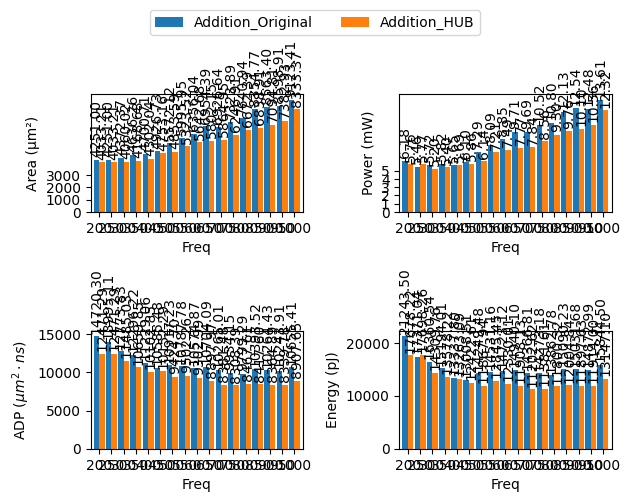

In [13]:
!mkdir - p figs

fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0, 0], legend=False,
                 y="Area",
                 rot=0,
                 ylabel="Area (µm²)",
                 width=0.9
                 )
axs[0, 0].grid(False, axis="x")
axs[0, 0].set_yticks(np.arange(0, 4000, 1000))
# Display values
axs[0, 0].bar_label(axs[0, 0].containers[0],
                    padding=2, rotation=90, fmt='%.2f')
axs[0, 0].bar_label(axs[0, 0].containers[1],
                    padding=2, rotation=90, fmt='%.2f')

power_df.plot.bar(ax=axs[0, 1], legend=False,
                  y="Power",
                  rot=0,
                  ylabel="Power (mW)",
                  width=0.9
                  )
axs[0, 1].grid(False, axis="x")
axs[0, 1].set_yticks(np.arange(0, 6, 1))
# Display values
axs[0, 1].bar_label(axs[0, 1].containers[0],
                    padding=2, rotation=90, fmt='%.2f')
axs[0, 1].bar_label(axs[0, 1].containers[1],
                    padding=2, rotation=90, fmt='%.2f')

# 3
# delay_df.plot.bar(ax=axs[1,0], legend=False,
#                  y="Delay",
#                  rot = 0,
#                  ylabel="Delay (ns)",
#                  width=0.9
# )
# axs[1,0].grid(False, axis="x")
# # Display values
# axs[1,0].bar_label(axs[1,0].containers[0], padding=2, rotation = 90, fmt='%.2f')
# axs[1,0].bar_label(axs[1,0].containers[1], padding=2, rotation = 90, fmt='%.2f')
#############
ADP_df.plot.bar(ax=axs[1, 0], legend=False,
                y="ADP",
                rot=0,
                ylabel="ADP ($\mu m^2 \cdot ns$)",
                width=0.9
                )
axs[1, 0].grid(False, axis="x")
# Display values
axs[1, 0].bar_label(axs[1, 0].containers[0],
                    padding=2, rotation=90, fmt='%.2f')
axs[1, 0].bar_label(axs[1, 0].containers[1],
                    padding=2, rotation=90, fmt='%.2f')

energy_df.plot.bar(ax=axs[1, 1], legend=False,
                   y="Energy",
                   rot=0,
                   #  logy="sym",
                   ylabel="Energy (pJ)",
                   width=0.9
                   )
axs[1, 1].grid(False, axis="x")
# Display values
axs[1, 1].bar_label(axs[1, 1].containers[0],
                    padding=2, rotation=90, fmt='%.2f')
axs[1, 1].bar_label(axs[1, 1].containers[1],
                    padding=2, rotation=90, fmt='%.2f')

# plt.legend(loc="upper left")
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

# plt.savefig("figs/adder.pdf", bbox_inches="tight")
plt.show()


## Multiplication

In [2]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,MET,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,MET,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,MET,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,MET,8145.446484,15.1352,2.85,43135.320,23214.522479


In [3]:
area_df = mult_df[["Area", "Design", "Bits"]].groupby(
    ["Design", "Bits"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Bits"]].groupby(
    ["Design", "Bits"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Bits"]].groupby(
    ["Design", "Bits"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Bits"]].groupby(
    ["Design", "Bits"], sort=False).sum().unstack(0)

area_df.head()

Area                   
Design Multiplication_Original Multiplication_HUB
Bits                                             
32               243067.207857      245589.257501

In [ ]:
area_gain = (area_df['Area']['Multiplication_Original'].values - area_df['Area']
             ['Multiplication_HUB'].values) / area_df['Area']['Multiplication_Original'].values
power_gain = (power_df['Power']['Multiplication_Original'].values - power_df['Power']
              ['Multiplication_HUB'].values) / power_df['Power']['Multiplication_Original'].values
delay_gain = (delay_df['Delay']['Multiplication_Original'].values - delay_df['Delay']
              ['Multiplication_HUB'].values) / delay_df['Delay']['Multiplication_Original'].values
energy_gain = (energy_df['Energy']['Multiplication_Original'].values - energy_df['Energy']
               ['Multiplication_HUB'].values) / energy_df['Energy']['Multiplication_Original'].values

print('        [ 8 bits   | 16 bits  | 32 bits  ]')
print('area  :', area_gain)
print('power :', power_gain)
print('delay :', delay_gain)
print('energy:', energy_gain)

In [ ]:
area_df.plot.bar(
    y="Area",
    rot=0,
    ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

In [ ]:
power_df.plot.bar(
    y="Power",
    rot=0,
    ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

In [ ]:
delay_df.plot.bar(
    y="Delay",
    rot=0,
    ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

In [ ]:
energy_df.plot.bar(
    y="Energy",
    rot=0,
    logy="sym",
    ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

In [ ]:
!mkdir - p figs

fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0, 0], legend=False,
                 y="Area",
                 rot=0,
                 ylabel="Area (µm²)",
                 width=0.9
                 )
axs[0, 0].grid(False, axis="x")
# axs[0,0].set_yticks(np.arange(0,4000,1000))
# Display values
axs[0, 0].bar_label(axs[0, 0].containers[0], padding=2, rotation=90)
axs[0, 0].bar_label(axs[0, 0].containers[1], padding=2, rotation=90)

power_df.plot.bar(ax=axs[0, 1], legend=False,
                  y="Power",
                  rot=0,
                  ylabel="Power (mW)",
                  width=0.9
                  )
axs[0, 1].grid(False, axis="x")
# axs[0,1].set_yticks(np.arange(0,6,1))
# Display values
axs[0, 1].bar_label(axs[0, 1].containers[0], padding=2, rotation=90)
axs[0, 1].bar_label(axs[0, 1].containers[1], padding=2, rotation=90)

delay_df.plot.bar(ax=axs[1, 0], legend=False,
                  y="Delay",
                  rot=0,
                  ylabel="Delay (ns)",
                  width=0.9
                  )
axs[1, 0].grid(False, axis="x")
# axs[1,0].set_yticks(np.arange(0,6,1))
# Display values
axs[1, 0].bar_label(axs[1, 0].containers[0], padding=2, rotation=90)
axs[1, 0].bar_label(axs[1, 0].containers[1], padding=2, rotation=90)

energy_df.plot.bar(ax=axs[1, 1], legend=False,
                   y="Energy",
                   rot=0,
                   #  logy="sym",
                   ylabel="Energy (pJ)",
                   width=0.9
                   )
axs[1, 1].grid(False, axis="x")
# Display values
axs[1, 1].bar_label(axs[1, 1].containers[0], padding=2, rotation=90)
axs[1, 1].bar_label(axs[1, 1].containers[1], padding=2, rotation=90)

# plt.legend(loc="upper left")
axLine, axLabel = axs[1, 1].get_legend_handles_labels()
fig.legend(axLine, axLabel,
           loc='upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.pdf", bbox_inches="tight")
plt.show()


### Multiple bitwidths

In [4]:
# Unconstrained results

area_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [2*60.6816, 2*171.4608, 2*392.0784],
                                   'Total': [516.4992, 1883.9520, 7468.3057],
                                   'Encoder': [116.4240, 227.2032, 564.2448],
                                   })

area_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                   'Decoders': [2*68.2080, 2*166.2864, 2*403.8384],
                                   'Total': [566.8320, 1984.3824, 7715.7361],
                                   'Encoder': [76.4400, 162.5232, 394.9008],
                                   })

area_std.set_index('Bits', inplace=True)
area_std['Core'] = area_std['Total'] - \
    area_std['Decoders'] - area_std['Encoder']
area_std = area_std[['Decoders', 'Core', 'Encoder']]

area_hub.set_index('Bits', inplace=True)
area_hub['Core'] = area_hub['Total'] - \
    area_hub['Decoders'] - area_hub['Encoder']
area_hub = area_hub[['Decoders', 'Core', 'Encoder']]

area_std

,Decoders,Core,Encoder
Bits,,,
8,121.3632,278.7120,116.4240
16,342.9216,1313.8272,227.2032
32,784.1568,6119.9041,564.2448


In [5]:
# Unconstrained results

power_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                    'Decoders': [5.83e-02+5.92e-02, 0.141+0.143, 0.275+0.276],
                                    'Total': [0.664, 3.031, 14.189],
                                    'Encoder': [0.130, 0.252, 0.821],
                                    })

power_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                    'Decoders': [6.56e-02+6.63e-02, 0.140+0.139, 0.278+0.279],
                                    'Total': [0.782, 3.340, 14.793],
                                    'Encoder': [8.86e-02, 0.178, 0.447],
                                    })

power_std.set_index('Bits', inplace=True)
power_std['Core'] = power_std['Total'] - \
    power_std['Decoders'] - power_std['Encoder']
power_std = area_std[['Decoders', 'Core', 'Encoder']]

power_hub.set_index('Bits', inplace=True)
power_hub['Core'] = power_hub['Total'] - \
    power_hub['Decoders'] - power_hub['Encoder']
power_hub = area_hub[['Decoders', 'Core', 'Encoder']]

power_std

,Decoders,Core,Encoder
Bits,,,
8,121.3632,278.7120,116.4240
16,342.9216,1313.8272,227.2032
32,784.1568,6119.9041,564.2448


In [6]:
# Unconstrained results
# Initiliatized with Ending times

delay_std = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                    'Decoders': [0.28, 0.60, 0.85],
                                    'Core': [0.72, 1.55, 2.55],
                                    'Encoder': [1.06, 2.06, 3.46],
                                    })

delay_hub = pd.DataFrame.from_dict({'Bits': [8, 16, 32],
                                    'Decoders': [0.26, 0.59, 0.90],
                                    'Core': [0.75, 1.55, 2.63],
                                    'Encoder': [0.94, 1.79, 2.97],
                                    })

# Compute real timing
delay_std.set_index('Bits', inplace=True)
delay_std['Encoder'] = delay_std['Encoder'] - delay_std['Core']
delay_std['Core'] = delay_std['Core'] - delay_std['Decoders']

delay_hub.set_index('Bits', inplace=True)
delay_hub['Encoder'] = delay_hub['Encoder'] - delay_hub['Core']
delay_hub['Core'] = delay_hub['Core'] - delay_hub['Decoders']

delay_std

,Decoders,Core,Encoder
Bits,,,
8,0.28,0.44,0.34
16,0.60,0.95,0.51
32,0.85,1.70,0.91


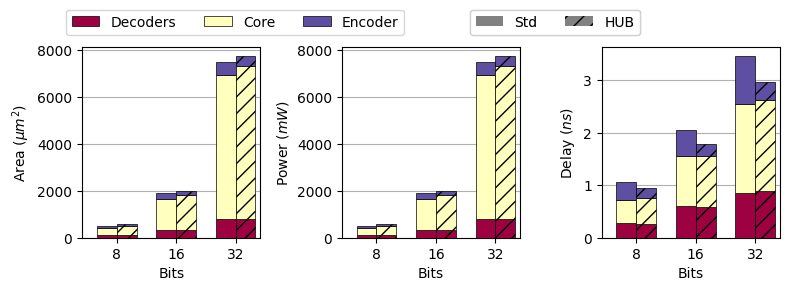

In [9]:
# Grouped

fig, axs = plt.subplots(nrows=1, ncols=3)

ax1 = plot_clustered_stacked([area_std, area_hub], [
    "Std", "HUB"], axe=axs[0], title='', zorder=3, ylabel=r"Area ($\mu m^2$)", cmap=plt.cm.Spectral)
ax2 = plot_clustered_stacked([power_std, power_hub], [
    "Std", "HUB"], axe=axs[1], title='', zorder=3, ylabel=r"Power ($mW$)", cmap=plt.cm.Spectral)
ax3 = plot_clustered_stacked([delay_std, delay_hub], [
    "Std", "HUB"], axe=axs[2], title='', zorder=3, ylabel=r"Delay ($ns$)", cmap=plt.cm.Spectral)


## Set global legend ##
# ax1.get_legend().remove()
# ax2.get_legend().remove()
ax3.get_legend().remove()

fig = plt.gcf()

h, l = ax1.get_legend_handles_labels()
# Add invisible data to add another legend
n = []
for i in range(2):
    # Bug with hatch. Solved with alpha!=1
    n.append(ax1.bar(0, 0, color="gray", hatch='/'*2*i, alpha=0.99))
l2 = fig.legend(n, ["Std", "HUB"],
                loc='upper center',
                bbox_to_anchor=(0.7, 1.1),
                ncol=2,)

axLine, axLabel = h, l
fig.legend(h[:3], l[:3],
           loc='upper center',
           ncol=3,
           #    title='Component',
           bbox_to_anchor=(0.3, 1.1)
           )
fig.add_artist(l2)


fig.set_size_inches(8, 8/3)
fig.tight_layout()

plt.savefig("mult_split.pdf", bbox_inches="tight")
plt.show()